# Idle Gyroscope & Accelerometer IMU9250 sensor measuring analysis
## Description:

This document will analyze almost one hour of data readings of the IMU9250 Gyroscope and Accelerometer from the GY-91 sensor module, 
to be exact Acceleration and Gyroscope in the X,Y and Z axis.
With such data, I will analyze the errors of each measurement done by using the Laboratory Manual from USM's Department of Physics.

The analysis will use the python libraries Pandas and Matplotlib, to do statistical analysys and create charts, respectively.

#### Technical information

The sensor used (GY-91) was configured to read acceleration in G's and the gyroscope readings in degrees/second.
From now on: g means G's; and d/s means degrees/second.

In [1]:
# Import Pandas and Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Import square root from math package

from math import sqrt

In [2]:
df = pd.read_csv('testing.csv', sep='\t') # Read the data, and import it to Pandas

## Initial Analysis

### Information about the data Gathered

In [3]:
df.head()

,Time(ms),AccelX(g),AccelY(g),AccelZ(g),GyroX(d/s),GyroY(d/s),GyroZ(d/s)
0,23594,-0.0,-0.0,-1.00,0.14,-0.07,0.08
1,23685,-0.0,-0.0,-1.01,0.03,0.03,0.13
2,23779,0.0,-0.0,-1.00,0.13,0.08,0.27
3,23870,-0.0,0.0,-1.00,-0.02,0.00,0.16
4,23961,0.0,0.0,-1.00,0.06,0.05,0.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24888 entries, 0 to 24887
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time(ms)    24888 non-null  int64  
 1   AccelX(g)   24888 non-null  float64
 2   AccelY(g)   24888 non-null  float64
 3   AccelZ(g)   24888 non-null  float64
 4   GyroX(d/s)  24888 non-null  float64
 5   GyroY(d/s)  24888 non-null  float64
 6   GyroZ(d/s)  24888 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.3 MB


The data gathered into this csv file, as pointed by the "df.info()" command, says that there are no null values, which means that all the readings of the sensor have useful data. Because of this, all the values of this dataframe will be used. If there is any abnormal reading, it will come to stand out through the error analysis.

### Getting total test gathering time

In [5]:
total_time_ms = df["Time(ms)"].iloc[-1] # Get the last element of the Time column (elapsed time)

In [6]:
total_time_min = total_time_ms/(1000*60) # Convert the time from milliseconds to minutes

The test's duration in minutes is:

In [7]:
round(total_time_min, 4) # Round the time to four decimals

55.8227

### Gathering Standard deviations for acceleration measurements

In [8]:
accel_x_std = round(df["AccelX(g)"].std(), 10)
accel_y_std = round(df["AccelY(g)"].std(), 10)
accel_z_std = round(df["AccelZ(g)"].std(), 10)

### Gathering Standard deviations for gyroscope measurements

In [9]:
gyro_x_std = round(df["GyroX(d/s)"].std(), 10)
gyro_y_std = round(df["GyroY(d/s)"].std(), 10)
gyro_z_std = round(df["GyroZ(d/s)"].std(), 10)

### Creating Acceleration Charts

For chart use, a new Time column in the data will be created, to use the time in minutes instead of milliseconds.

It may seem contradicting later on, to see charts of the Gyroscope measurements with the unit d/s, but this is no contradiction, since the rigorous analysis is done with the original time data (if needed), and the plotting of the time in minutes, it's only made to ensure the charts fit the visual format of this report.

In [10]:
df["Time(min)"]=df["Time(ms)"]/(60*1000)

#### Acceleration X

Text(0, 0.04, 'Standar Deviation: 0.0007299976')

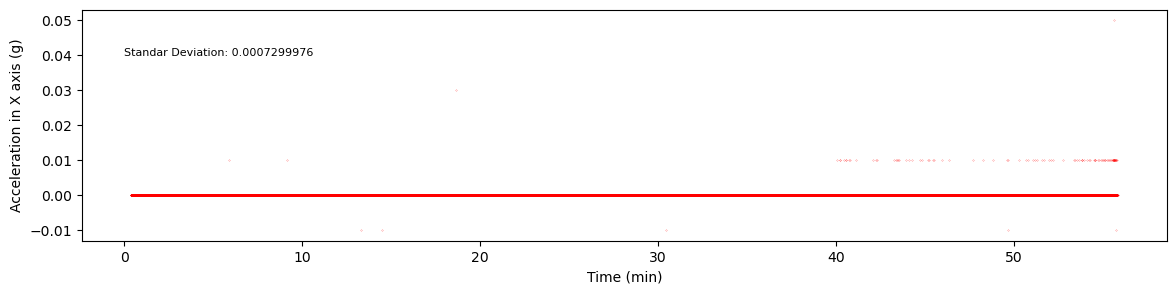

In [11]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["AccelX(g)"], s=0.02, alpha=1, c="red")
plt.xlabel("Time (min)")
plt.ylabel("Acceleration in X axis (g)")
plt.text(0, 0.04, "Standar Deviation: " + str(accel_x_std), fontsize = 8)

#### Acceleration Y

Text(0, 0.04, 'Standar Deviation: 0.0006767403')

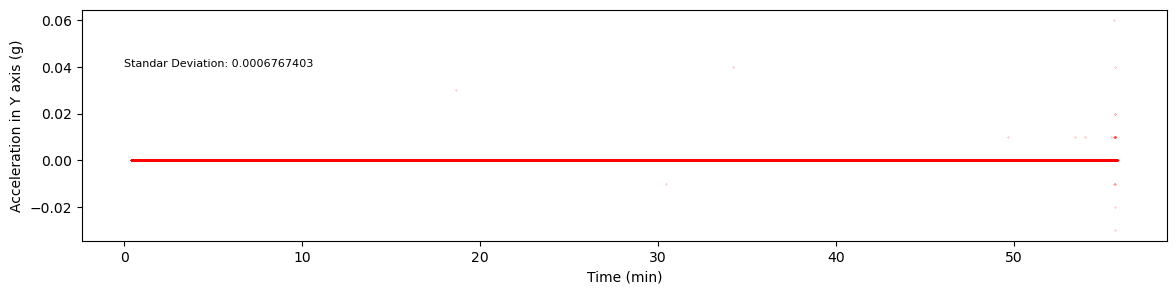

In [12]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["AccelY(g)"], s=0.02, alpha=1, c="red")
plt.xlabel("Time (min)")
plt.ylabel("Acceleration in Y axis (g)")
plt.text(0, 0.04, "Standar Deviation: " + str(accel_y_std), fontsize = 8)

#### Acceleration Z

Text(0, -0.988, 'Standar Deviation: 0.0059361093')

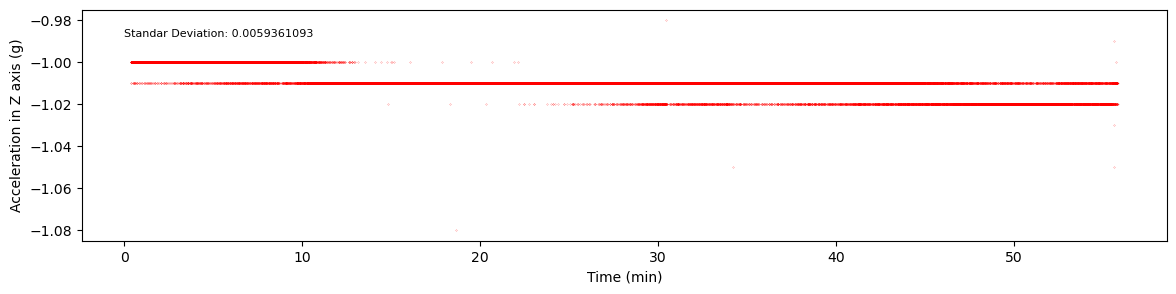

In [13]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["AccelZ(g)"], s=0.02, alpha=1, c="red")
plt.xlabel("Time (min)")
plt.ylabel("Acceleration in Z axis (g)")
plt.text(0, -0.988, "Standar Deviation: " + str(accel_z_std), fontsize = 8)

### Creating Gyroscope Charts

#### Gyroscope X

Text(0, 4, 'Standar Deviation: 0.0793719172')

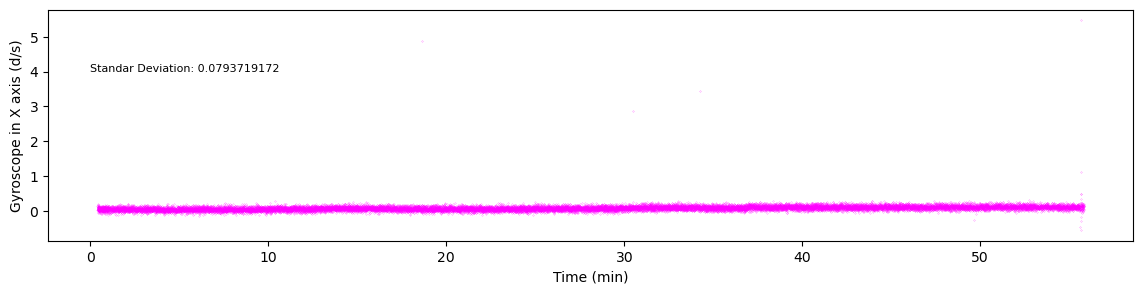

In [14]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["GyroX(d/s)"], s=0.02, alpha=1, c="magenta")
plt.xlabel("Time (min)")
plt.ylabel("Gyroscope in X axis (d/s)")
plt.text(0, 4, "Standar Deviation: " + str(gyro_x_std), fontsize = 8)

#### Gyroscope Y

Text(0, 4, 'Standar Deviation: 0.0927881562')

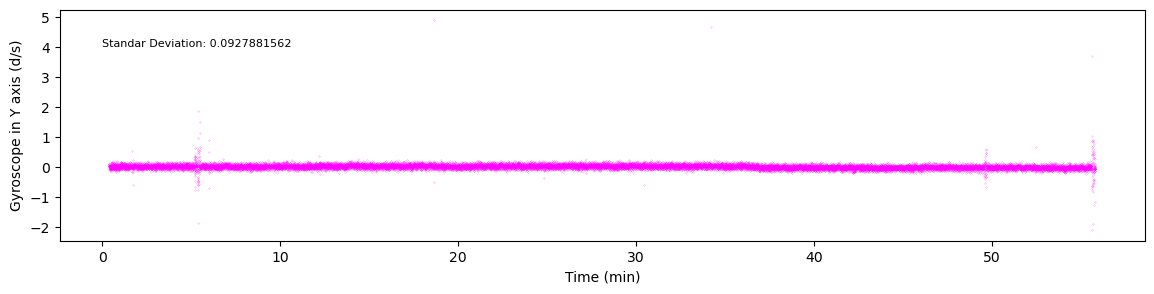

In [15]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["GyroY(d/s)"], s=0.02, alpha=1, c="magenta")
plt.xlabel("Time (min)")
plt.ylabel("Gyroscope in Y axis (d/s)")
plt.text(0, 4, "Standar Deviation: " + str(gyro_y_std), fontsize = 8)

#### Gyroscope Z

Text(0, 4, 'Standar Deviation: 0.0689124165')

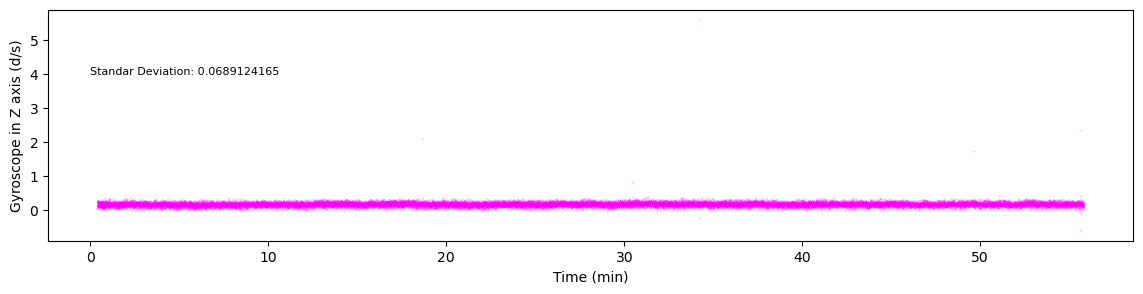

In [16]:
plt.figure(figsize=(14,3))
plt.scatter(df["Time(min)"], df["GyroZ(d/s)"], s=0.02, alpha=1, c="magenta")
plt.xlabel("Time (min)")
plt.ylabel("Gyroscope in Z axis (d/s)")
plt.text(0, 4, "Standar Deviation: " + str(gyro_z_std), fontsize = 8)

## Error analysis

#### Acceleration errors

Aquiring mean values for each acceleration axis:

In [17]:
accel_x_mean = round(df["AccelX(g)"].mean(), 8)
accel_y_mean = round(df["AccelY(g)"].mean(), 8)
accel_z_mean = round(df["AccelZ(g)"].mean(), 8)

Using the manual's indications, the statistical error is reported as the mean plus minus three typical mean error, assuming the distribution is normal.

Also, all the errors are reported with only one significant figure.

#### Calculating typical error and Acceleration random error

In [18]:
accel_x_typ_err = (accel_x_mean)/sqrt(len(df["AccelX(g)"]))
accel_y_typ_err = (accel_y_mean)/sqrt(len(df["AccelY(g)"]))
accel_z_typ_err = (accel_z_mean)/sqrt(len(df["AccelZ(g)"]))


accel_x_ran_err = round(3*accel_x_typ_err, 6)
accel_y_ran_err = round(3*accel_y_typ_err, 7)
accel_z_ran_err = round(3*accel_z_typ_err, 2)

### The final acceleration readings are the following:

In [19]:
accel_x_rep_value = f"({accel_x_mean} ± {accel_x_ran_err}) g"
accel_y_rep_value = f"({accel_y_mean} ± {accel_y_ran_err}) g"
accel_z_rep_value = f"({accel_z_mean} ± {accel_z_ran_err}) g"


print(f"Acceleration in X axis: {accel_x_rep_value}")
print(f"Acceleration in Y axis: {accel_y_rep_value}")
print(f"Acceleration in Z axis: {accel_z_rep_value}")

Acceleration in X axis: (3.897e-05 ± 1e-06) g
Acceleration in Y axis: (9.64e-06 ± 2e-07) g
Acceleration in Z axis: (-1.01023264 ± -0.02) g


#### Gyroscope errors

Aquiring mean values for each gyroscope axis:

In [20]:
gyro_x_mean = round(df["GyroX(d/s)"].mean(), 8)
gyro_y_mean = round(df["GyroY(d/s)"].mean(), 8)
gyro_z_mean = round(df["GyroZ(d/s)"].mean(), 8)

Using the manual's indications, the statistical error is reported as the mean plus minus three typical mean error, assuming the distribution is normal.

Also, all the errors are reported with only one significant figure.

#### Calculating typical error and Gyroscope random error

In [21]:
gyro_x_typ_err = (gyro_x_mean)/sqrt(len(df["GyroX(d/s)"]))
gyro_y_typ_err = (gyro_y_mean)/sqrt(len(df["GyroY(d/s)"]))
gyro_z_typ_err = (gyro_z_mean)/sqrt(len(df["GyroZ(d/s)"]))


gyro_x_ran_err = round(3*gyro_x_typ_err, 3)
gyro_y_ran_err = round(3*gyro_y_typ_err, 4)
gyro_z_ran_err = round(3*gyro_z_typ_err, 3)

### The final gyroscope readings are the following:

In [22]:
gyro_x_rep_value = f"({gyro_x_mean} ± {gyro_x_ran_err}) d/s"
gyro_y_rep_value = f"({gyro_y_mean} ± {gyro_y_ran_err}) d/s"
gyro_z_rep_value = f"({gyro_z_mean} ± {gyro_z_ran_err}) d/s"


print(f"Gyroscope in X axis: {gyro_x_rep_value}")
print(f"Gyroscope in Y axis: {gyro_y_rep_value}")
print(f"Gyroscope in Z axis: {gyro_z_rep_value}")

Gyroscope in X axis: (0.07669801 ± 0.001) d/s
Gyroscope in Y axis: (0.01626205 ± 0.0003) d/s
Gyroscope in Z axis: (0.18183824 ± 0.003) d/s


## Final charts with error data

In [1]:
fig = plt.figure()
plt.grid
gs = fig.add_gridspec(3, 2, hspace=0.1)

((ax1, ax4),
(ax2, ax5), 
(ax3, ax6)) = gs.subplots(sharex=True)


fig.set_figwidth(18)
fig.set_figheight(12)


ax1.scatter(df["Time(min)"], df["AccelX(g)"], s=0.02, alpha=1, c="red")
ax1.set(ylabel="Acceleration X axis (g)")
ax1.text(0, 0.04, "Reported Value: " + accel_x_rep_value, fontsize = 12)

ax2.scatter(df["Time(min)"], df["AccelY(g)"], s=0.02, alpha=1, c="coral")
ax2.set(ylabel="Acceleration Y axis (g)")
ax2.text(0, 0.04, "Reported Value: " + accel_y_rep_value, fontsize = 12)

ax3.scatter(df["Time(min)"], df["AccelZ(g)"], s=0.02, alpha=1, c="orange")
ax3.set(ylabel="Acceleration Z axis (g)")
ax3.text(0, -0.99, "Reported Value: " + accel_z_rep_value, fontsize = 12)
ax3.set(xlabel='Time (min)')

ax4.scatter(df["Time(min)"], df["GyroX(d/s)"], s=0.02, alpha=1, c="purple")
ax4.text(0, 4.35, "Reported Value: " + gyro_x_rep_value, fontsize = 12)
ax4.set(ylabel="Gyroscope X axis (d/s)")

ax5.scatter(df["Time(min)"], df["GyroY(d/s)"], s=0.02, alpha=1, c="darkviolet")
ax5.text(0, 4.35, "Reported Value: " + gyro_y_rep_value, fontsize = 12)
ax5.set(ylabel="Gyroscope Y axis (d/s)")

ax6.scatter(df["Time(min)"], df["GyroZ(d/s)"], s=0.02, alpha=1, c="violet")
ax6.text(0, 4.35, "Reported Value: " + gyro_z_rep_value, fontsize = 12)
ax6.set(ylabel="Gyroscope Z axis (d/s)")
ax6.set(xlabel='Time (min)')

for ax in fig.get_axes():
    ax.grid()


# Saving the chart
fig.savefig('IMU9250 errors chart.png')
fig.savefig('IMU9250 errors chart.svg')

NameError: name 'plt' is not defined